## Example 1: Without Activation Function (Linear Model)

a. We’ll generate synthetic data (points that fall into two categories, similar to pizza/pasta lovers).

b We’ll train a simple neural network with one hidden layer (using linear transformation without an activation function in one case, and with an activation function in the other).

c:\Program Files\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


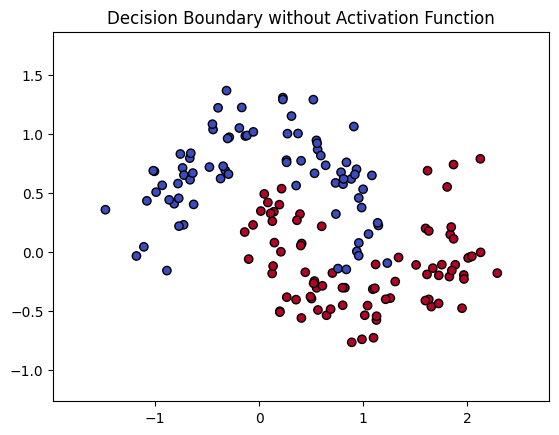

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate a non-linear dataset (two interleaving half circles)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
y = y.reshape(-1, 1)  # Reshape y to be a column vector

# Neural Network Model without activation function
class NeuralNetworkWithoutActivation:
    def __init__(self, input_dim, hidden_dim, output_dim):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_dim, hidden_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim)
        self.b2 = np.zeros((1, output_dim))

    def forward(self, X):
        # First layer (Hidden layer without activation)
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.z1  # No activation function
        
        # Output layer (No activation here either)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2  # No sigmoid for output, raw output

    def backward(self, X, y, output, learning_rate=0.1):
        # Compute gradients using backpropagation
        output_error = output - y
        output_delta = output_error  # No activation derivative
        
        hidden_error = np.dot(output_delta, self.W2.T)
        hidden_delta = hidden_error  # No activation derivative

        # Update weights and biases
        self.W2 -= np.dot(self.a1.T, output_delta) * learning_rate
        self.b2 -= np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.W1 -= np.dot(X.T, hidden_delta) * learning_rate
        self.b1 -= np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs=10000, learning_rate=0.1):
        for i in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the neural network without activation function
nn_no_activation = NeuralNetworkWithoutActivation(input_dim=2, hidden_dim=3, output_dim=1)

# Train the neural network
nn_no_activation.train(X_train, y_train, epochs=10000, learning_rate=0.1)

# Predictions on the test set
y_pred_no_activation = nn_no_activation.forward(X_test)
y_pred_class_no_activation = (y_pred_no_activation > 0.5).astype(int)

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='coolwarm', edgecolors='k')
    plt.title("Decision Boundary without Activation Function")
    plt.show()

# Plot the decision boundary without activation function
plot_decision_boundary(X_train, y_train, nn_no_activation)


What’s happening here:

a. The model tries to separate the points using only a linear transformation (no activation function).

b Since the data follows a non-linear relationship, the model struggles to find a good boundary between the classes.

## Example 2: With Activation Function (Non-Linear Model)

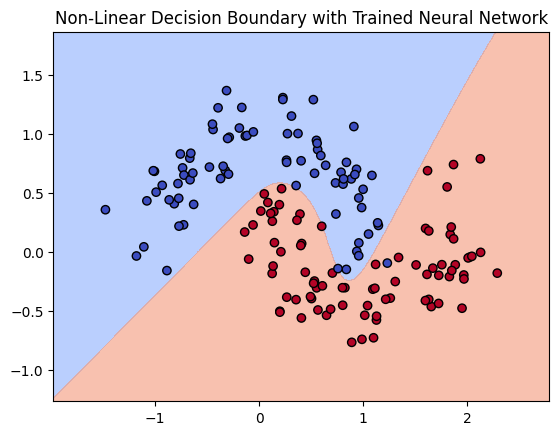

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate a non-linear dataset (two interleaving half circles)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
y = y.reshape(-1, 1)  # Reshape y to be a column vector

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Neural Network Model with 1 hidden layer
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_dim, hidden_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim)
        self.b2 = np.zeros((1, output_dim))

    def forward(self, X):
        # First layer (Hidden layer)
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)  # Activation function (Sigmoid)
        
        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        a2 = sigmoid(self.z2)  # Sigmoid for binary classification
        return a2

    def backward(self, X, y, output, learning_rate=0.1):
        # Compute gradients using backpropagation
        output_error = output - y
        output_delta = output_error * sigmoid_derivative(self.z2)

        hidden_error = np.dot(output_delta, self.W2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.z1)

        # Update weights and biases
        self.W2 -= np.dot(self.a1.T, output_delta) * learning_rate
        self.b2 -= np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.W1 -= np.dot(X.T, hidden_delta) * learning_rate
        self.b1 -= np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs=10000, learning_rate=0.1):
        for i in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the neural network
nn = NeuralNetwork(input_dim=2, hidden_dim=3, output_dim=1)

# Train the neural network
nn.train(X_train, y_train, epochs=10000, learning_rate=0.1)

# Predictions on the test set
y_pred = nn.forward(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='coolwarm', edgecolors='k')
    plt.title("Non-Linear Decision Boundary with Trained Neural Network")
    plt.show()

# Plot the decision boundary after training
plot_decision_boundary(X_train, y_train, nn)
